<a href="https://colab.research.google.com/github/yallabalaji/MachineLearning/blob/main/Machine_Learning_Microsoft_Malware_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading all Librarires required

In [157]:
%%capture
! pip install opendatasets --upgrade
! pip install pandas
! pip install numpy
! pip install scikit-learn
! pip install category_encoders
! pip install seaborn
! pip install matplotlib
! pip install --upgrade plotly

Import all the libraries

In [158]:
import opendatasets as od
import pandas as pd
import numpy as np
import category_encoders as ce
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
dataset_url = 'https://www.kaggle.com/competitions/microsoft-malware-prediction/data?select=train.csv'

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yallabalaji
Your Kaggle Key: ··········


100%|██████████| 1.54G/1.54G [00:20<00:00, 80.4MB/s]



Extracting archive ./microsoft-malware-prediction/microsoft-malware-prediction.zip to ./microsoft-malware-prediction


In [5]:
og_df = pd.read_csv('/content/microsoft-malware-prediction/train.csv',nrows=300000)

<ipython-input-5-89711d3bbe7b>:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  og_df = pd.read_csv('/content/microsoft-malware-prediction/train.csv',nrows=300000)


Here the target col is HasDetections, so we are taking a sample amount data , that is the first 3 Lac records for testing . During the progress i have came across many doubts, may be picking the first 3 lac records could underfit or bais to any result. To clear the issue i have checked whether the 3 lac are having equal ratio of results. It was lucky that there were split properly having negative and postive equally.  How ever if there any need to split manually one can go through video https://www.youtube.com/watch?v=xtFo1IiZqzM

In [6]:
og_df['HasDetections'].value_counts()

1    150148
0    149852
Name: HasDetections, dtype: int64

In [7]:
og_df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,08a0f9e3730c9b20c9b6f941978def3d,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1578.0,0,7.0,0,NaN,53447.0,...,NaN,0,NaN,1.0,0,0,0.0,0.0,7.0,0
299996,08a0fa6a8e81b20cdf8b2e5801037bbb,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1311.0,0,7.0,0,NaN,53447.0,...,70328.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
299997,08a102ac7617782ff55dd3986bca91f9,win8defender,1.1.15000.2,4.18.1806.18062,1.271.325.0,0,7.0,0,NaN,62773.0,...,20246.0,1,0.0,0.0,1,0,0.0,0.0,10.0,0
299998,08a1048c533eb514170eb24a6ad1c67b,win8defender,1.1.13407.0,4.13.17134.228,1.235.2287.0,0,7.0,0,1910.0,7945.0,...,19970.0,0,NaN,0.0,0,0,0.0,1.0,3.0,1


Perfect we are having 3 lac records now we need clean the data set ,after ward we need to split in 70 15 15 ratio for train,val and test set

In [8]:
og_df.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,300000.000000,298872.000000,300000.000000,14475.000000,298778.000000,298778.000000,298778.000000,300000.000000,300000.000000,289200.000000,...,294641.000000,300000.000000,109632.0,299472.000000,300000.000000,300000.000000,297609.00000,289753.000000,289753.000000,300000.000000
mean,0.000007,6.845452,0.017433,1653.075924,47873.965171,1.325198,1.021039,0.987717,108.088230,81274.113402,...,33024.818403,0.485413,0.0,0.007029,0.125257,0.037977,0.05693,0.282772,7.876526,0.500493
std,0.002582,1.025265,0.130880,1001.394666,14001.688400,0.521491,0.166671,0.110148,62.976311,48958.292675,...,21206.504656,0.499788,0.0,0.083544,0.331010,0.191140,0.23171,0.450347,4.552061,0.500001
min,0.000000,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,5.000000,...,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,...,13168.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000,0.000000
50%,0.000000,7.000000,0.000000,1632.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,...,33070.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,10.000000,1.000000
75%,0.000000,7.000000,0.000000,2373.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,123984.000000,...,52436.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.00000,1.000000,11.000000,1.000000
max,1.000000,8.000000,1.000000,3204.000000,70486.000000,5.000000,4.000000,1.000000,222.000000,167962.000000,...,72091.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000,1.000000,15.000000,1.000000


Analyzing the dtype of the Data Frame

In [9]:
og_df.dtypes[:20]

MachineIdentifier               object
ProductName                     object
EngineVersion                   object
AppVersion                      object
AvSigVersion                    object
IsBeta                           int64
RtpStateBitfield               float64
IsSxsPassiveMode                 int64
DefaultBrowsersIdentifier      float64
AVProductStatesIdentifier      float64
AVProductsInstalled            float64
AVProductsEnabled              float64
HasTpm                           int64
CountryIdentifier                int64
CityIdentifier                 float64
OrganizationIdentifier         float64
GeoNameIdentifier              float64
LocaleEnglishNameIdentifier      int64
Platform                        object
Processor                       object
dtype: object

In [10]:
og_df.dtypes[20:40]

OsVer                                      object
OsBuild                                     int64
OsSuite                                     int64
OsPlatformSubRelease                       object
OsBuildLab                                 object
SkuEdition                                 object
IsProtected                               float64
AutoSampleOptIn                             int64
PuaMode                                    object
SMode                                     float64
IeVerIdentifier                           float64
SmartScreen                                object
Firewall                                  float64
UacLuaenable                              float64
Census_MDC2FormFactor                      object
Census_DeviceFamily                        object
Census_OEMNameIdentifier                  float64
Census_OEMModelIdentifier                 float64
Census_ProcessorCoreCount                 float64
Census_ProcessorManufacturerIdentifier    float64


In [11]:
og_df.dtypes[40:60]

Census_ProcessorModelIdentifier                      float64
Census_ProcessorClass                                 object
Census_PrimaryDiskTotalCapacity                      float64
Census_PrimaryDiskTypeName                            object
Census_SystemVolumeTotalCapacity                     float64
Census_HasOpticalDiskDrive                             int64
Census_TotalPhysicalRAM                              float64
Census_ChassisTypeName                                object
Census_InternalPrimaryDiagonalDisplaySizeInInches    float64
Census_InternalPrimaryDisplayResolutionHorizontal    float64
Census_InternalPrimaryDisplayResolutionVertical      float64
Census_PowerPlatformRoleName                          object
Census_InternalBatteryType                            object
Census_InternalBatteryNumberOfCharges                float64
Census_OSVersion                                      object
Census_OSArchitecture                                 object
Census_OSBranch         

In [12]:
og_df.dtypes[60:]

Census_OSSkuName                            object
Census_OSInstallTypeName                    object
Census_OSInstallLanguageIdentifier         float64
Census_OSUILocaleIdentifier                  int64
Census_OSWUAutoUpdateOptionsName            object
Census_IsPortableOperatingSystem             int64
Census_GenuineStateName                     object
Census_ActivationChannel                    object
Census_IsFlightingInternal                 float64
Census_IsFlightsDisabled                   float64
Census_FlightRing                           object
Census_ThresholdOptIn                      float64
Census_FirmwareManufacturerIdentifier      float64
Census_FirmwareVersionIdentifier           float64
Census_IsSecureBootEnabled                   int64
Census_IsWIMBootEnabled                    float64
Census_IsVirtualDevice                     float64
Census_IsTouchEnabled                        int64
Census_IsPenCapable                          int64
Census_IsAlwaysOnAlwaysConnecte

Looks like the dataframe has proper dtype for numeric . Now we have to change object to category section

In [13]:
numeric_cols = og_df.select_dtypes(include=np.number).columns.tolist()
len(numeric_cols)

53

In [14]:
categorical_cols = og_df.select_dtypes(include='object').columns.tolist()
len(categorical_cols)

30

Checking the status of NaN feilds in each column

In [15]:
og_df.isna().sum()[:40]

MachineIdentifier                              0
ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
IsBeta                                         0
RtpStateBitfield                            1128
IsSxsPassiveMode                               0
DefaultBrowsersIdentifier                 285525
AVProductStatesIdentifier                   1222
AVProductsInstalled                         1222
AVProductsEnabled                           1222
HasTpm                                         0
CountryIdentifier                              0
CityIdentifier                             10800
OrganizationIdentifier                     92327
GeoNameIdentifier                              2
LocaleEnglishNameIdentifier                    0
Platform                                       0
Processor                                      0
OsVer               

In [16]:
og_df.isna().sum()[40:]

Census_ProcessorModelIdentifier                        1381
Census_ProcessorClass                                298721
Census_PrimaryDiskTotalCapacity                        1748
Census_PrimaryDiskTypeName                              460
Census_SystemVolumeTotalCapacity                       1748
Census_HasOpticalDiskDrive                                0
Census_TotalPhysicalRAM                                2715
Census_ChassisTypeName                                   14
Census_InternalPrimaryDiagonalDisplaySizeInInches      1676
Census_InternalPrimaryDisplayResolutionHorizontal      1673
Census_InternalPrimaryDisplayResolutionVertical        1673
Census_PowerPlatformRoleName                              1
Census_InternalBatteryType                           213230
Census_InternalBatteryNumberOfCharges                  9100
Census_OSVersion                                          0
Census_OSArchitecture                                     0
Census_OSBranch                         

By Careful observation and looking at description ,The following columns are irrelevant for machine learning process.

AutoSampleOptIn,Census_InternalBatteryNumberOfCharges,Census_InternalBatteryType,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_IsWIMBootEnabled,Census_ProcessorClass,Census_ProcessorClass,Census_ThresholdOptIn,Census_ThresholdOptIn,DefaultBrowsersIdentifier,IsBeta,ProductName,PuaMode,UacLuaenable

In [17]:
og_df['AutoSampleOptIn'].value_counts()  #which almost seems to be zero

0    299989
1        11
Name: AutoSampleOptIn, dtype: int64

In [18]:
unnecessary_features = ["AutoSampleOptIn","Census_InternalBatteryNumberOfCharges","Census_InternalBatteryType",
                        "Census_IsFlightingInternal","Census_IsFlightsDisabled","Census_IsWIMBootEnabled",
                        "Census_ProcessorClass","Census_ProcessorClass","Census_ThresholdOptIn",
                        "DefaultBrowsersIdentifier","IsBeta","ProductName","PuaMode","UacLuaenable"]

In [19]:
for feature in unnecessary_features:
  print("_________________________")
  print(og_df[feature].value_counts())

_________________________
0    299989
1        11
Name: AutoSampleOptIn, dtype: int64
_________________________
0.000000e+00    169654
4.294967e+09     75844
1.000000e+00      1851
1.600000e+01       945
2.000000e+00       939
                 ...  
3.691600e+04         1
1.327000e+03         1
4.103000e+03         1
4.414000e+04         1
2.746800e+04         1
Name: Census_InternalBatteryNumberOfCharges, Length: 3626, dtype: int64
_________________________
lion    68067
li-i     8266
#        6266
lip      2074
liio     1124
li p      267
li        203
nimh      164
real       89
pbac       85
bq20       61
vbox       51
unkn       13
lgi0       11
lipp        9
lhp0        3
lipo        3
4cel        3
ithi        2
batt        2
ram         2
a140        1
bad         1
lio        1
lit         1
asmb        1
Name: Census_InternalBatteryType, dtype: int64
_________________________
0.0    50866
1.0        1
Name: Census_IsFlightingInternal, dtype: int64
_________________________
0

By observing we can say most of them having same value for all dataset like more than 97%, there are also irrelevant feilds which are not reason or cause any impact to target column

Droping all these unnecessary features using df.drop

In [20]:
og_df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,08a0f9e3730c9b20c9b6f941978def3d,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1578.0,0,7.0,0,NaN,53447.0,...,NaN,0,NaN,1.0,0,0,0.0,0.0,7.0,0
299996,08a0fa6a8e81b20cdf8b2e5801037bbb,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1311.0,0,7.0,0,NaN,53447.0,...,70328.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
299997,08a102ac7617782ff55dd3986bca91f9,win8defender,1.1.15000.2,4.18.1806.18062,1.271.325.0,0,7.0,0,NaN,62773.0,...,20246.0,1,0.0,0.0,1,0,0.0,0.0,10.0,0
299998,08a1048c533eb514170eb24a6ad1c67b,win8defender,1.1.13407.0,4.13.17134.228,1.235.2287.0,0,7.0,0,1910.0,7945.0,...,19970.0,0,NaN,0.0,0,0,0.0,1.0,3.0,1


In [21]:
og_df = og_df.drop(unnecessary_features,axis=1)

In [22]:
og_df

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,7.0,0,53447.0,1.0,1.0,1,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,7.0,0,53447.0,1.0,1.0,1,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,7.0,0,53447.0,1.0,1.0,1,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.0,0,53447.0,1.0,1.0,1,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.273.1379.0,7.0,0,53447.0,1.0,1.0,1,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,08a0f9e3730c9b20c9b6f941978def3d,1.1.15200.1,4.18.1807.18075,1.275.1578.0,7.0,0,53447.0,1.0,1.0,1,...,NaN,NaN,0,1.0,0,0,0.0,0.0,7.0,0
299996,08a0fa6a8e81b20cdf8b2e5801037bbb,1.1.15100.1,4.18.1807.18075,1.273.1311.0,7.0,0,53447.0,1.0,1.0,1,...,142.0,70328.0,1,0.0,0,0,0.0,0.0,15.0,1
299997,08a102ac7617782ff55dd3986bca91f9,1.1.15000.2,4.18.1806.18062,1.271.325.0,7.0,0,62773.0,1.0,1.0,1,...,355.0,20246.0,1,0.0,1,0,0.0,0.0,10.0,0
299998,08a1048c533eb514170eb24a6ad1c67b,1.1.13407.0,4.13.17134.228,1.235.2287.0,7.0,0,7945.0,2.0,1.0,1,...,355.0,19970.0,0,0.0,0,0,0.0,1.0,3.0,1


By careful observation we can classify the whole data set features into three classification for imputation process

1.   Binary classification
2.   Numerical Classification
3.   Categorical Classification





The classification of numerical and categorical is done easily by either saying whether it is object kind or numerical. But finding binary classification needs to be done . The reason being the impuatation process for each classification is different.

1.   Binary classification : Here we cannot implement mean or median techniques for filling NA feilds since it cause the trouble. feild here must be only 0 or 1. It is like switch we can turn on or off but not at angle

2.   Numerical classification : These can filled by using mean and median. My approach is to use median reason being outlier might exist.

3.   Categorical classification : These can filled with new category called unknown. only 3 category are with na feilds. where one among them have more than 1 L+ na feild. The remaining 2 can be fixed with less than 1k+



In [23]:
numeric_cols = og_df.select_dtypes(include=np.number).columns.tolist()
print(len(numeric_cols))
categorical_cols = og_df.select_dtypes(include='object').columns.tolist()
print(len(categorical_cols))

44
26


In [24]:
for feature in numeric_cols:
  print("_________________")
  print(og_df[feature].value_counts())

_________________
7.0    290826
0.0      6412
8.0       794
5.0       685
3.0       100
1.0        55
Name: RtpStateBitfield, dtype: int64
_________________
0    294770
1      5230
Name: IsSxsPassiveMode, dtype: int64
_________________
53447.0    196238
7945.0      15931
47238.0     10934
62773.0      8905
46413.0      3833
            ...  
57659.0         1
7063.0          1
7763.0          1
42767.0         1
68579.0         1
Name: AVProductStatesIdentifier, Length: 4068, dtype: int64
_________________
1.0    209132
2.0     82441
3.0      6911
4.0       277
5.0        17
Name: AVProductsInstalled, dtype: int64
_________________
1.0    291013
2.0      6714
0.0       847
3.0       193
4.0        11
Name: AVProductsEnabled, dtype: int64
_________________
1    296315
0      3685
Name: HasTpm, dtype: int64
_________________
43     13374
29     11621
141    11193
93      9552
171     9319
       ...  
216        7
212        7
186        7
217        3
161        3
Name: CountryIdentifie

In [25]:
binary_cols = ["IsSxsPassiveMode",
"HasTpm",
"IsProtected",
"SMode",
"Firewall",
"Census_HasOpticalDiskDrive",
"Census_IsPortableOperatingSystem",
"Census_IsSecureBootEnabled",
"Census_IsVirtualDevice",
"Census_IsTouchEnabled",
"Census_IsPenCapable",
"Census_IsAlwaysOnAlwaysConnectedCapable",
"Wdft_IsGamer",
]

In [26]:
og_df['HasDetections'].isna().sum() # there is no nan feild for target column

0

In [27]:
len(numeric_cols)

44

In [28]:
for feature in binary_cols:
  if(feature in numeric_cols):
    numeric_cols.remove(feature)
print(len(numeric_cols))

31


now we have binary_cols,numeric_cols,categorical_cols

using imputer for filling nan values using scikit learn imputer

First we will handle NaN feilds of numerical cols

In [29]:
og_df[numeric_cols].isna().sum() # NaN feilds of numeric cols

RtpStateBitfield                                      1128
AVProductStatesIdentifier                             1222
AVProductsInstalled                                   1222
AVProductsEnabled                                     1222
CountryIdentifier                                        0
CityIdentifier                                       10800
OrganizationIdentifier                               92327
GeoNameIdentifier                                        2
LocaleEnglishNameIdentifier                              0
OsBuild                                                  0
OsSuite                                                  0
IeVerIdentifier                                       1998
Census_OEMNameIdentifier                              3142
Census_OEMModelIdentifier                             3380
Census_ProcessorCoreCount                             1378
Census_ProcessorManufacturerIdentifier                1378
Census_ProcessorModelIdentifier                       13

In [30]:
numeric_imputer = SimpleImputer(strategy = 'median')

In [31]:
numeric_imputer.fit(og_df[numeric_cols])

SimpleImputer(strategy='median')

In [32]:
list(numeric_imputer.statistics_)

[7.0,
 53447.0,
 1.0,
 1.0,
 97.0,
 82373.0,
 27.0,
 181.0,
 88.0,
 16299.0,
 768.0,
 117.0,
 2102.0,
 246715.0,
 4.0,
 5.0,
 2500.0,
 476940.0,
 249450.0,
 4096.0,
 15.5,
 1366.0,
 768.0,
 16299.0,
 285.0,
 9.0,
 34.0,
 500.0,
 33070.0,
 10.0,
 1.0]

In [33]:
og_df[numeric_cols] = numeric_imputer.transform(og_df[numeric_cols])

In [34]:
og_df[numeric_cols].isna().sum()

RtpStateBitfield                                     0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuild                                              0
OsSuite                                              0
IeVerIdentifier                                      0
Census_OEMNameIdentifier                             0
Census_OEMModelIdentifier                            0
Census_ProcessorCoreCount                            0
Census_ProcessorManufacturerIdentifier               0
Census_ProcessorModelIdentifier                      0
Census_PrimaryDiskTotalCapacity                      0
Census_Sys

handled the numeric section of cols , filling NaN values.

In [35]:
og_df[binary_cols].isna().sum()

IsSxsPassiveMode                               0
HasTpm                                         0
IsProtected                                 1215
SMode                                      17707
Firewall                                    3099
Census_HasOpticalDiskDrive                     0
Census_IsPortableOperatingSystem               0
Census_IsSecureBootEnabled                     0
Census_IsVirtualDevice                       528
Census_IsTouchEnabled                          0
Census_IsPenCapable                            0
Census_IsAlwaysOnAlwaysConnectedCapable     2391
Wdft_IsGamer                               10247
dtype: int64

Handling Binary Col using imputer and mode startergy as it has only two options
1 or 0

In [36]:
binary_imputer = SimpleImputer(strategy = 'most_frequent')

In [37]:
binary_imputer.fit(og_df[binary_cols])

SimpleImputer(strategy='most_frequent')

In [38]:
list(binary_imputer.statistics_)

[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [39]:
og_df[binary_cols] = binary_imputer.transform(og_df[binary_cols])

In [40]:
og_df[binary_cols].isna().sum()

IsSxsPassiveMode                           0
HasTpm                                     0
IsProtected                                0
SMode                                      0
Firewall                                   0
Census_HasOpticalDiskDrive                 0
Census_IsPortableOperatingSystem           0
Census_IsSecureBootEnabled                 0
Census_IsVirtualDevice                     0
Census_IsTouchEnabled                      0
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
dtype: int64

Binary NaN feilds are handled. Now lets solve categorical

In [41]:
og_df[categorical_cols].isna().sum()

MachineIdentifier                        0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
SmartScreen                         106903
Census_MDC2FormFactor                    0
Census_DeviceFamily                      0
Census_PrimaryDiskTypeName             460
Census_ChassisTypeName                  14
Census_PowerPlatformRoleName             1
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEdition                         0
Census_OSSkuName                         0
Census_OSInstallTypeName                 0
Census_OSWUAutoUpdateOptionsName         0
Census_Genu

In [42]:
og_df['SmartScreen'].value_counts()

RequireAdmin    144995
ExistsNotSet     35312
Off               6250
Warn              4502
Prompt            1154
Block              762
off                 56
On                  27
&#x01;              20
&#x02;              11
on                   8
Name: SmartScreen, dtype: int64

In [43]:
categorical_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

In [44]:
categorical_imputer.fit(og_df[categorical_cols])

SimpleImputer(fill_value='unknown', strategy='constant')

In [45]:
list(categorical_imputer.statistics_)

['unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown']

In [46]:
og_df[categorical_cols] = categorical_imputer.transform(og_df[categorical_cols])

In [47]:
og_df[categorical_cols].isna().sum()

MachineIdentifier                   0
EngineVersion                       0
AppVersion                          0
AvSigVersion                        0
Platform                            0
Processor                           0
OsVer                               0
OsPlatformSubRelease                0
OsBuildLab                          0
SkuEdition                          0
SmartScreen                         0
Census_MDC2FormFactor               0
Census_DeviceFamily                 0
Census_PrimaryDiskTypeName          0
Census_ChassisTypeName              0
Census_PowerPlatformRoleName        0
Census_OSVersion                    0
Census_OSArchitecture               0
Census_OSBranch                     0
Census_OSEdition                    0
Census_OSSkuName                    0
Census_OSInstallTypeName            0
Census_OSWUAutoUpdateOptionsName    0
Census_GenuineStateName             0
Census_ActivationChannel            0
Census_FlightRing                   0
dtype: int64

In [48]:
og_df['SmartScreen'].value_counts()

RequireAdmin    144995
unknown         106903
ExistsNotSet     35312
Off               6250
Warn              4502
Prompt            1154
Block              762
off                 56
On                  27
&#x01;              20
&#x02;              11
on                   8
Name: SmartScreen, dtype: int64

Scaling the features.
scale numeric features to a small range of values e.g.
(
0
,
1
)
(0,1) or
(
−
1
,
1
)
(−1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [49]:
og_df[numeric_cols].describe()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,...,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier,HasDetections
count,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000
mean,6.846033,47896.66600,1.323873,1.020953,108.088230,81313.673320,25.525320,169.975580,122.955033,15717.179710,...,1547.386183,897.164917,15832.291017,973.452673,14.591283,60.53519,404.196107,33025.625497,7.949057,0.500493
std,1.023379,13977.65027,0.520839,0.166336,62.976311,48069.399017,4.765037,89.212994,69.441366,2192.556739,...,367.904096,214.223648,1962.708113,2930.141530,10.181720,45.02138,219.831972,21016.241929,4.490239,0.500001
min,0.000000,39.00000,1.000000,0.000000,1.000000,5.000000,1.000000,1.000000,1.000000,7600.000000,...,-1.000000,-1.000000,10240.000000,0.000000,1.000000,5.00000,9.000000,5.000000,1.000000,0.000000
25%,7.000000,49480.00000,1.000000,1.000000,51.000000,37761.000000,27.000000,89.000000,74.000000,15063.000000,...,1366.000000,768.000000,15063.000000,165.000000,8.000000,31.00000,142.000000,13299.000000,3.000000,0.000000
50%,7.000000,53447.00000,1.000000,1.000000,97.000000,82373.000000,27.000000,181.000000,88.000000,16299.000000,...,1366.000000,768.000000,16299.000000,285.000000,9.000000,34.00000,500.000000,33070.000000,10.000000,1.000000
75%,7.000000,53447.00000,2.000000,1.000000,162.000000,121302.000000,27.000000,267.000000,182.000000,17134.000000,...,1920.000000,1080.000000,17134.000000,547.000000,20.000000,90.25000,556.000000,52242.000000,11.000000,1.000000
max,8.000000,70486.00000,5.000000,4.000000,222.000000,167962.000000,52.000000,296.000000,283.000000,18242.000000,...,8192.000000,4320.000000,18242.000000,17976.000000,39.000000,162.00000,1087.000000,72091.000000,15.000000,1.000000


In [50]:
numeric_scaler = MinMaxScaler()

In [51]:
numeric_scaler.fit(og_df[numeric_cols])

MinMaxScaler()

In [52]:
print('Minimum : ')
list(numeric_scaler.data_min_)

Minimum : 


[0.0,
 39.0,
 1.0,
 0.0,
 1.0,
 5.0,
 1.0,
 1.0,
 1.0,
 7600.0,
 16.0,
 1.0,
 74.0,
 23.0,
 1.0,
 1.0,
 10.0,
 8191.0,
 7385.0,
 512.0,
 4.7,
 -1.0,
 -1.0,
 10240.0,
 0.0,
 1.0,
 5.0,
 9.0,
 5.0,
 1.0,
 0.0]

In [53]:
print('Maximum:')
list(numeric_scaler.data_max_)

Maximum:


[8.0,
 70486.0,
 5.0,
 4.0,
 222.0,
 167962.0,
 52.0,
 296.0,
 283.0,
 18242.0,
 784.0,
 429.0,
 6144.0,
 345494.0,
 88.0,
 10.0,
 4478.0,
 22892657.0,
 22892041.0,
 671744.0,
 142.0,
 8192.0,
 4320.0,
 18242.0,
 17976.0,
 39.0,
 162.0,
 1087.0,
 72091.0,
 15.0,
 1.0]

In [54]:
og_df[numeric_cols]= numeric_scaler.transform(og_df[numeric_cols])

In [55]:
og_df[numeric_cols].describe()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,...,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Wdft_RegionIdentifier,HasDetections
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.855754,0.679343,0.080968,0.255238,0.484562,0.484104,0.480889,0.572799,0.432465,0.762749,...,0.188989,0.207860,0.698862,0.054153,0.357665,0.353727,0.366601,0.458073,0.496361,0.500493
std,0.127922,0.198414,0.130210,0.041584,0.284961,0.286201,0.093432,0.302417,0.246246,0.206029,...,0.044905,0.049577,0.245277,0.163003,0.267940,0.286760,0.203926,0.291544,0.320731,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.875000,0.701818,0.000000,0.250000,0.226244,0.224796,0.509804,0.298305,0.258865,0.701278,...,0.166850,0.177968,0.602724,0.009179,0.184211,0.165605,0.123377,0.184419,0.142857,0.000000
50%,0.875000,0.758130,0.000000,0.250000,0.434389,0.490411,0.509804,0.610169,0.308511,0.817422,...,0.166850,0.177968,0.757186,0.015854,0.210526,0.184713,0.455473,0.458688,0.642857,1.000000
75%,0.875000,0.758130,0.250000,0.250000,0.728507,0.722191,0.509804,0.901695,0.641844,0.895884,...,0.234468,0.250174,0.861535,0.030429,0.500000,0.542994,0.507421,0.724648,0.714286,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


One Hot Encoding Scaling for categorical data

In [56]:
encoder = OneHotEncoder(sparse= False,handle_unknown = 'ignore')

In [57]:
encoder.fit(og_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [58]:
pd.set_option('display.max_columns',None)

In [59]:
encoder = ce.BinaryEncoder(cols=categorical_cols)

In [60]:
df_encoded = encoder.fit_transform(og_df[categorical_cols])

In [61]:
og_df

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,SMode,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0.875,0.0,0.758130,0.00,0.25,1.0,0.126697,0.762278,0.333333,0.115254,0.602837,windows10,x64,10.0.0.0,0.895884,0.312500,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0.0,0.317757,unknown,1.0,Desktop,Windows.Desktop,0.427348,0.026344,0.034483,0.444444,0.521710,0.020483,HDD,0.012763,0.0,0.005339,Desktop,0.103423,0.175882,0.208517,Desktop,10.0.17134.165,amd64,rs4_release,0.861535,0.009179,Professional,PROFESSIONAL,UUPUpgrade,0.657895,0.726115,UNKNOWN,0.0,IS_GENUINE,Retail,Retail,0.574212,0.501332,0.0,0.0,0.0,0.0,0.0,0.0,0.642857,0.0
1,000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,0.875,0.0,0.758130,0.00,0.25,1.0,0.416290,0.008794,0.333333,0.400000,0.223404,windows10,x64,10.0.0.0,0.895884,0.312500,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0.0,0.317757,unknown,1.0,Notebook,Windows.Desktop,0.427348,0.265241,0.034483,0.444444,0.536034,0.020483,HDD,0.004151,0.0,0.005339,Notebook,0.067007,0.166850,0.177968,Mobile,10.0.17134.1,amd64,rs4_release,0.861535,0.000056,Professional,PROFESSIONAL,IBSClean,0.184211,0.165605,UNKNOWN,0.0,OFFLINE,Retail,NOT_SET,0.574212,0.802555,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0.875,0.0,0.758130,0.00,0.25,1.0,0.384615,0.914365,0.333333,0.213559,0.170213,windows10,x64,10.0.0.0,0.895884,0.979167,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0.0,0.317757,RequireAdmin,1.0,Desktop,Windows.Desktop,0.796540,0.919550,0.034483,0.444444,0.439123,0.004644,SSD,0.004655,0.0,0.005339,Desktop,0.122360,0.234468,0.250174,Desktop,10.0.17134.165,amd64,rs4_release,0.861535,0.009179,Core,CORE,UUPUpgrade,0.157895,0.159236,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,Retail,0.123377,0.730752,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0.875,0.0,0.758130,0.00,0.25,1.0,0.393665,0.123276,0.509804,0.393220,0.404255,windows10,x64,10.0.0.0,0.895884,0.312500,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0.0,0.317757,ExistsNotSet,1.0,Desktop,Windows.Desktop,0.225535,0.798524,0.034483,0.444444,0.506491,0.010063,UNKNOWN,0.009602,0.0,0.005339,MiniTower,0.100510,0.166850,0.177968,Desktop,10.0.17134.228,amd64,rs4_release,0.861535,0.012684,Professional,PROFESSIONAL,UUPUpgrade,0.421053,0.375796,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,Retail,0.320965,0.278071,0.0,0.0,0.0,0.0,0.0,0.

In [62]:
final_df = og_df.join(df_encoded,how='inner')

In [63]:
final_df

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,SMode,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Censu

In [64]:
final_df = final_df.drop(categorical_cols,axis=1)

In [65]:
final_df

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2
0,0.875,0.0,0.758130,0.00,0.25,1.0,0.126697,0.762278,0.333333,0.115254,0.602837,0.895884,0.312500,1.0,0.0,0.317757,1.0,0.427348,0.026344,0.034483,0.444444,0.521710,0.020483,0.012763,0.0,0.005339,0.103423,0.175882,0.208517,0.861535,0.009179,0.657895,0.726115,0.0,0.574212,0.501332,0.0,0.0,0.0,0.0,0.0,0.0,0.642857,0.0,0,0,0,0,0,0,0,0,0,

In [66]:
final_df.columns.get_loc('HasDetections')

43

In [67]:
target_col = final_df.pop('HasDetections')

In [68]:
final_df.insert(len(final_df.columns),"HasDetections", target_col)

In [69]:
final_df.columns[-1]

'HasDetections'

In [70]:
final_df

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2,HasDetections
0,0.875,0.0,0.758130,0.00,0.25,1.0,0.126697,0.762278,0.333333,0.115254,0.602837,0.895884,0.312500,1.0,0.0,0.317757,1.0,0.427348,0.026344,0.034483,0.444444,0.521710,0.020483,0.012763,0.0,0.005339,0.103423,0.175882,0.208517,0.861535,0.009179,0.657895,0.726115,0.0,0.574212,0.501332,0.0,0.0,0.0,0.0,0.0,0.0,0.642857,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
final_df.to_csv('Cleaned_Microsoft_Malware_Analysis_Data')

In [72]:
final_df

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2,HasDetections
0,0.875,0.0,0.758130,0.00,0.25,1.0,0.126697,0.762278,0.333333,0.115254,0.602837,0.895884,0.312500,1.0,0.0,0.317757,1.0,0.427348,0.026344,0.034483,0.444444,0.521710,0.020483,0.012763,0.0,0.005339,0.103423,0.175882,0.208517,0.861535,0.009179,0.657895,0.726115,0.0,0.574212,0.501332,0.0,0.0,0.0,0.0,0.0,0.0,0.642857,0,0,0,0,0,0,0,0,0,0,0,

Identifying Inputs and target columns

In [73]:
cols = final_df.columns.tolist()

In [74]:
input_cols,target_col = cols[:-1],cols[-1]

In [75]:
print(input_cols)
print("_____")
print(target_col)

['RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'SMode', 'IeVerIdentifier', 'Firewall', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSystem', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'C

In [76]:
inputs_df,target = final_df[input_cols].copy() , final_df[target_col].copy()

In [77]:
inputs_df

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2
0,0.875,0.0,0.758130,0.00,0.25,1.0,0.126697,0.762278,0.333333,0.115254,0.602837,0.895884,0.312500,1.0,0.0,0.317757,1.0,0.427348,0.026344,0.034483,0.444444,0.521710,0.020483,0.012763,0.0,0.005339,0.103423,0.175882,0.208517,0.861535,0.009179,0.657895,0.726115,0.0,0.574212,0.501332,0.0,0.0,0.0,0.0,0.0,0.0,0.642857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [78]:
target

0         0.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
299995    0.0
299996    1.0
299997    0.0
299998    1.0
299999    1.0
Name: HasDetections, Length: 300000, dtype: float64

In [79]:
train_inputs,valx_inputs,train_targets,valx_targets = train_test_split(
    inputs_df[input_cols], target, test_size=0.3, random_state=42)

In [80]:
train_inputs

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2
186295,0.875,0.0,0.758130,0.00,0.25,1.0,0.045249,0.435111,0.509804,0.050847,0.358156,0.895884,0.312500,1.0,0.0,0.317757,1.0,0.072817,0.545117,0.034483,0.444444,0.584154,0.004644,0.004650,0.0,0.035850,0.141296,0.234468,0.277945,0.861535,0.015854,0.105263,0.133758,0.0,0.123377,0.120356,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1

In [81]:
valx_inputs

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2
4941,0.875,0.0,0.335259,0.25,0.25,1.0,0.294118,0.598927,0.509804,0.298305,0.308511,0.817422,0.979167,1.0,0.0,0.271028,1.0,0.767051,0.868015,0.011494,0.444444,0.442032,0.020483,0.020456,0.0,0.002288,0.067735,0.166850,0.177968,0.757186,0.023976,0.342105,0.280255,0.0,0.823748,0.095636,1.0,0.0,0.0,0.0,0.0,0.0,0.285714,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1

In [82]:
train_targets

186295    0.0
127847    0.0
274740    1.0
74908     1.0
11630     1.0
         ... 
119879    0.0
259178    0.0
131932    1.0
146867    1.0
121958    1.0
Name: HasDetections, Length: 210000, dtype: float64

In [83]:
valx_targets

4941      0.0
51775     1.0
115253    0.0
299321    1.0
173570    0.0
         ... 
255501    1.0
146711    1.0
254979    0.0
250029    1.0
228965    1.0
Name: HasDetections, Length: 90000, dtype: float64

splitting up valx into val and test once more

In [84]:
val_inputs,test_inputs,val_targets,test_targets = train_test_split(valx_inputs,valx_targets,test_size=0.5,random_state=42)

In [85]:
val_inputs

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2
255600,0.875,0.0,0.758130,0.00,0.25,1.0,0.963801,0.367136,0.509804,0.935593,0.262411,0.817422,0.312500,1.0,0.0,0.271028,1.0,0.334102,0.714074,0.080460,0.444444,0.666294,0.020490,0.012182,0.0,0.023646,0.077932,0.351642,0.416802,0.757186,0.023976,0.184211,0.165605,0.0,0.455473,0.458688,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,1,1,1,1,0,0,1,1,0,0,1,1,1,0

In [86]:
val_targets

255600    1.0
123059    1.0
280196    1.0
237687    1.0
83789     0.0
         ... 
30827     0.0
259566    1.0
59113     1.0
235942    0.0
206471    0.0
Name: HasDetections, Length: 45000, dtype: float64

In [87]:
test_inputs

,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,SMode,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,MachineIdentifier_0,MachineIdentifier_1,MachineIdentifier_2,MachineIdentifier_3,MachineIdentifier_4,MachineIdentifier_5,MachineIdentifier_6,MachineIdentifier_7,MachineIdentifier_8,MachineIdentifier_9,MachineIdentifier_10,MachineIdentifier_11,MachineIdentifier_12,MachineIdentifier_13,MachineIdentifier_14,MachineIdentifier_15,MachineIdentifier_16,MachineIdentifier_17,MachineIdentifier_18,EngineVersion_0,EngineVersion_1,EngineVersion_2,EngineVersion_3,EngineVersion_4,EngineVersion_5,AppVersion_0,AppVersion_1,AppVersion_2,AppVersion_3,AppVersion_4,AppVersion_5,AppVersion_6,AvSigVersion_0,AvSigVersion_1,AvSigVersion_2,AvSigVersion_3,AvSigVersion_4,AvSigVersion_5,AvSigVersion_6,AvSigVersion_7,AvSigVersion_8,AvSigVersion_9,AvSigVersion_10,AvSigVersion_11,AvSigVersion_12,Platform_0,Platform_1,Platform_2,Processor_0,Processor_1,OsVer_0,OsVer_1,OsVer_2,OsVer_3,OsPlatformSubRelease_0,OsPlatformSubRelease_1,OsPlatformSubRelease_2,OsPlatformSubRelease_3,OsBuildLab_0,OsBuildLab_1,OsBuildLab_2,OsBuildLab_3,OsBuildLab_4,OsBuildLab_5,OsBuildLab_6,OsBuildLab_7,OsBuildLab_8,SkuEdition_0,SkuEdition_1,SkuEdition_2,SkuEdition_3,SmartScreen_0,SmartScreen_1,SmartScreen_2,SmartScreen_3,Census_MDC2FormFactor_0,Census_MDC2FormFactor_1,Census_MDC2FormFactor_2,Census_MDC2FormFactor_3,Census_DeviceFamily_0,Census_DeviceFamily_1,Census_PrimaryDiskTypeName_0,Census_PrimaryDiskTypeName_1,Census_PrimaryDiskTypeName_2,Census_ChassisTypeName_0,Census_ChassisTypeName_1,Census_ChassisTypeName_2,Census_ChassisTypeName_3,Census_ChassisTypeName_4,Census_ChassisTypeName_5,Census_PowerPlatformRoleName_0,Census_PowerPlatformRoleName_1,Census_PowerPlatformRoleName_2,Census_PowerPlatformRoleName_3,Census_OSVersion_0,Census_OSVersion_1,Census_OSVersion_2,Census_OSVersion_3,Census_OSVersion_4,Census_OSVersion_5,Census_OSVersion_6,Census_OSVersion_7,Census_OSVersion_8,Census_OSArchitecture_0,Census_OSArchitecture_1,Census_OSBranch_0,Census_OSBranch_1,Census_OSBranch_2,Census_OSBranch_3,Census_OSEdition_0,Census_OSEdition_1,Census_OSEdition_2,Census_OSEdition_3,Census_OSEdition_4,Census_OSSkuName_0,Census_OSSkuName_1,Census_OSSkuName_2,Census_OSSkuName_3,Census_OSSkuName_4,Census_OSInstallTypeName_0,Census_OSInstallTypeName_1,Census_OSInstallTypeName_2,Census_OSInstallTypeName_3,Census_OSWUAutoUpdateOptionsName_0,Census_OSWUAutoUpdateOptionsName_1,Census_OSWUAutoUpdateOptionsName_2,Census_GenuineStateName_0,Census_GenuineStateName_1,Census_GenuineStateName_2,Census_ActivationChannel_0,Census_ActivationChannel_1,Census_ActivationChannel_2,Census_FlightRing_0,Census_FlightRing_1,Census_FlightRing_2
118517,0.875,0.0,0.758130,0.00,0.25,1.0,0.823529,0.212078,0.333333,0.298305,0.308511,0.895884,0.312500,1.0,0.0,0.317757,1.0,0.334102,0.701848,0.011494,0.444444,0.444942,0.020483,0.020450,0.0,0.005339,0.078660,0.166850,0.177968,0.861535,0.012684,0.342105,0.280255,0.0,0.505566,0.459174,1.0,0.0,0.0,0.0,0.0,0.0,0.714286,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0

In [88]:
test_targets

118517    1.0
93675     0.0
137038    1.0
22395     0.0
14652     1.0
         ... 
214017    0.0
41350     1.0
25621     0.0
76461     0.0
102888    1.0
Name: HasDetections, Length: 45000, dtype: float64

Finally we have train_inputs,train_targets,val_inputs,val_targets,test_inputs,test_targets

Implementing our first base line model or first machine learning Model Logistic Regression Model

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
lr_lib_linear_model = LogisticRegression(solver='liblinear') #using liblinear

In [91]:
lr_lib_linear_model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

In [92]:
train_preds = lr_lib_linear_model.predict(train_inputs)

In [93]:
train_targets

186295    0.0
127847    0.0
274740    1.0
74908     1.0
11630     1.0
         ... 
119879    0.0
259178    0.0
131932    1.0
146867    1.0
121958    1.0
Name: HasDetections, Length: 210000, dtype: float64

In [94]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(train_targets,train_preds)

0.6255761904761905

50 % of data is yes and 50 % data is no -- which means that 12% better than dummy model.

In [96]:
from sklearn.metrics import confusion_matrix

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [97]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.61542502, 0.38457498],
       [0.36432798, 0.63567202]])

In [98]:
def predict_and_plot(model,inputs,targets,name=''):
  preds = model.predict(inputs)
  accuracy = accuracy_score(targets,preds)
  print("This is a {}".format(model))
  print("Accuracy: {:.2f}%".format(accuracy*100))

  cf = confusion_matrix(targets,preds,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True,cmap='Blues')
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name));

This is a LogisticRegression(solver='liblinear')
Accuracy: 62.56%


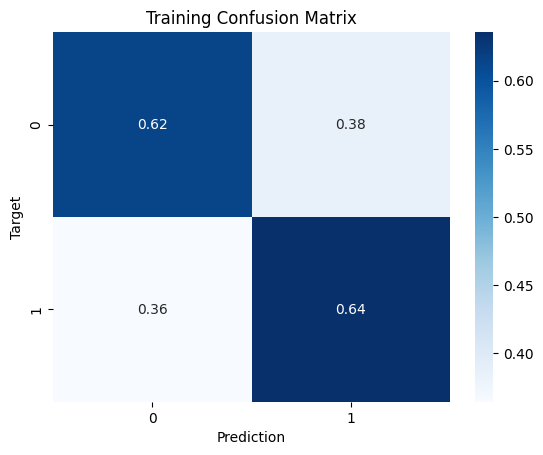

In [99]:
predict_and_plot(lr_lib_linear_model,train_inputs,train_targets,'Training')

This is a LogisticRegression(solver='liblinear')
Accuracy: 62.60%


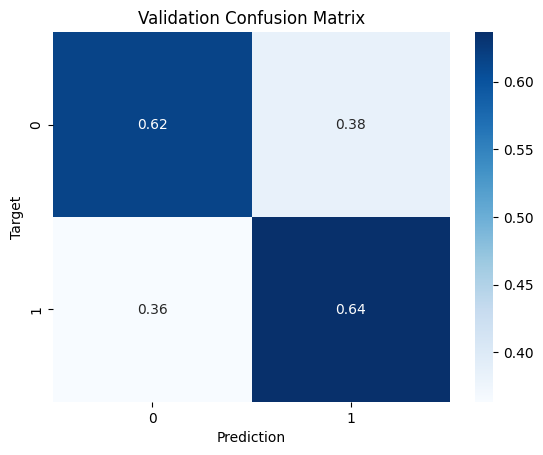

In [100]:
predict_and_plot(lr_lib_linear_model,val_inputs,val_targets,'Validation')

In [101]:
lr_newton_cg_model = LogisticRegression(solver='newton-cg')  # using newton-cg

In [102]:
lr_newton_cg_model.fit(train_inputs,train_targets)

LogisticRegression(solver='newton-cg')

This is a LogisticRegression(solver='newton-cg')
Accuracy: 62.56%


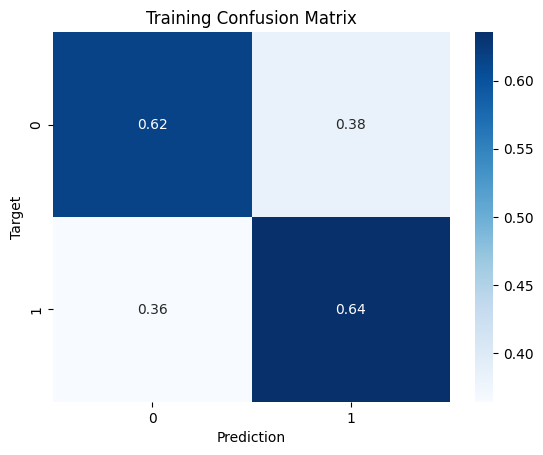

In [103]:
predict_and_plot(lr_newton_cg_model,train_inputs,train_targets,'Training')

This is a LogisticRegression(solver='newton-cg')
Accuracy: 62.61%


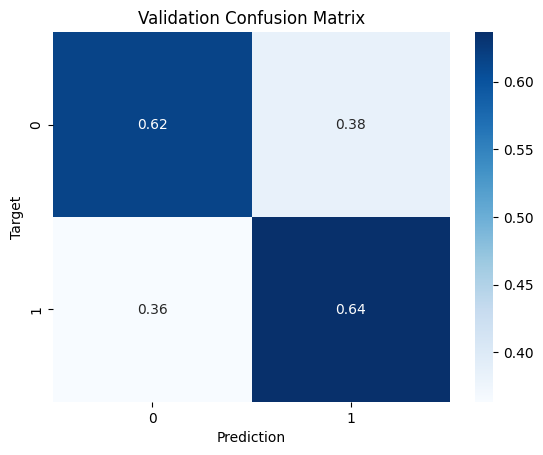

In [104]:
predict_and_plot(lr_newton_cg_model,val_inputs,val_targets,'Validation')

In [105]:
lr_sag_model = LogisticRegression(solver='sag')

In [106]:
lr_sag_model.fit(train_inputs,train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

This is a LogisticRegression(solver='sag')
Accuracy: 62.56%


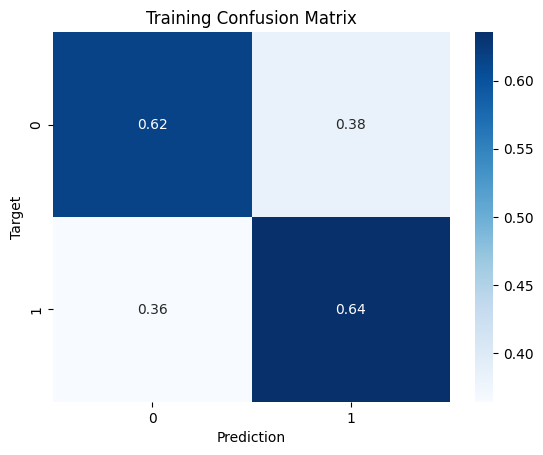

In [107]:
predict_and_plot(lr_sag_model,train_inputs,train_targets,"Training")

This is a LogisticRegression(solver='sag')
Accuracy: 62.60%


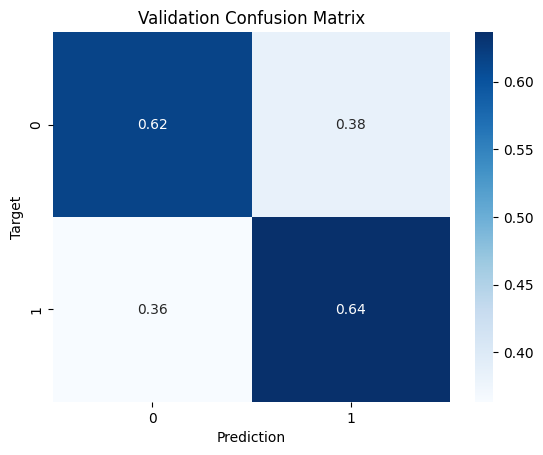

In [108]:
predict_and_plot(lr_sag_model,val_inputs,val_targets,"Validation")

In [109]:
lr_saga_model = LogisticRegression(solver='saga',max_iter=500)

In [110]:
lr_saga_model.fit(train_inputs,train_targets)

LogisticRegression(max_iter=500, solver='saga')

In [111]:
lr_saga_model.max_iter

500

This is a LogisticRegression(max_iter=500, solver='saga')
Accuracy: 62.56%


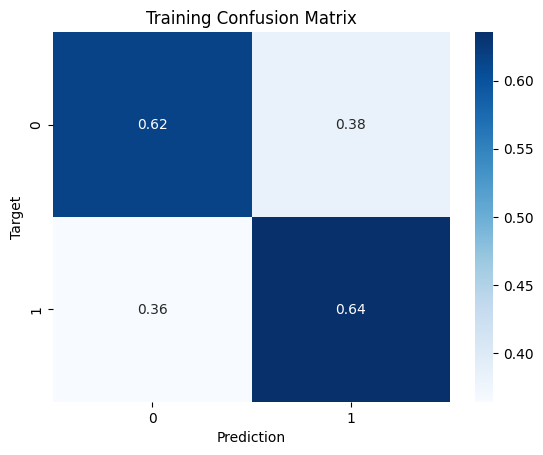

In [112]:
predict_and_plot(lr_saga_model,train_inputs,train_targets,"Training")

This is a LogisticRegression(max_iter=500, solver='saga')
Accuracy: 62.61%


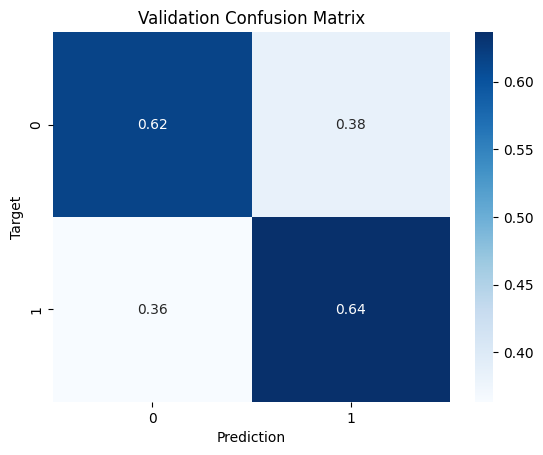

In [113]:
predict_and_plot(lr_saga_model,val_inputs,val_targets,"Validation")

In [114]:
lr_lbfgs_linear_model = LogisticRegression(solver='lbfgs',max_iter=1000)

In [115]:
lr_lbfgs_linear_model.fit(train_inputs,train_targets)

LogisticRegression(max_iter=1000)

This is a LogisticRegression(max_iter=1000)
Accuracy: 62.57%


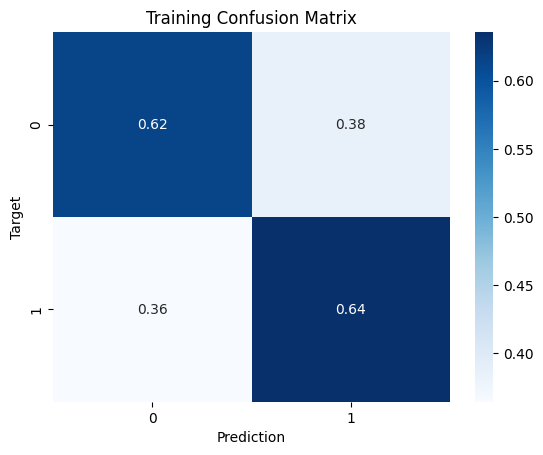

In [116]:
predict_and_plot(lr_lbfgs_linear_model,train_inputs,train_targets,"Training")

This is a LogisticRegression(max_iter=1000)
Accuracy: 62.60%


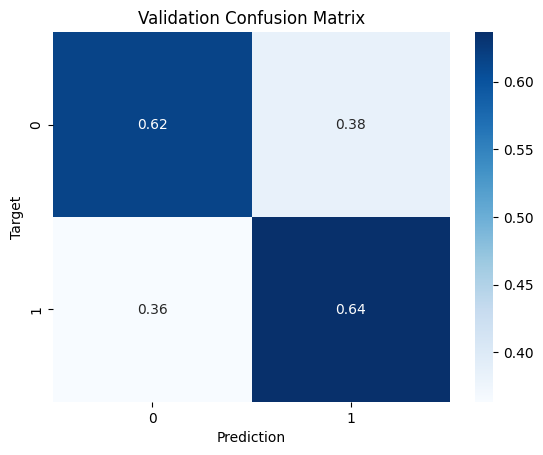

In [117]:
predict_and_plot(lr_lbfgs_linear_model,val_inputs,val_targets,"Validation")

Implementation of SGDClassifier

In [118]:
from sklearn.linear_model import SGDClassifier

In [119]:
sgd_cls_model= SGDClassifier()

In [120]:
sgd_cls_model.fit(train_inputs,train_targets)

SGDClassifier()

This is a SGDClassifier()
Accuracy: 60.45%


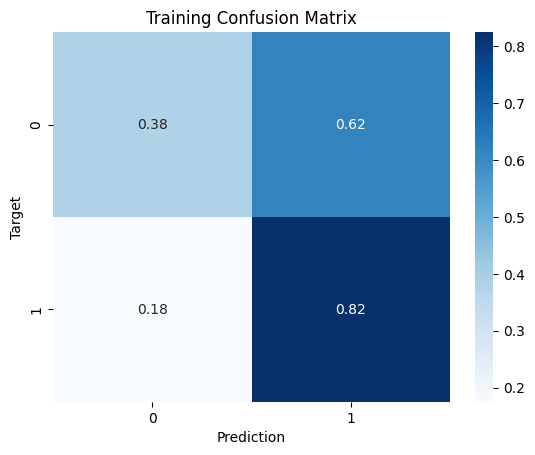

In [121]:
predict_and_plot(sgd_cls_model,train_inputs,train_targets,"Training")

This is a SGDClassifier()
Accuracy: 60.11%


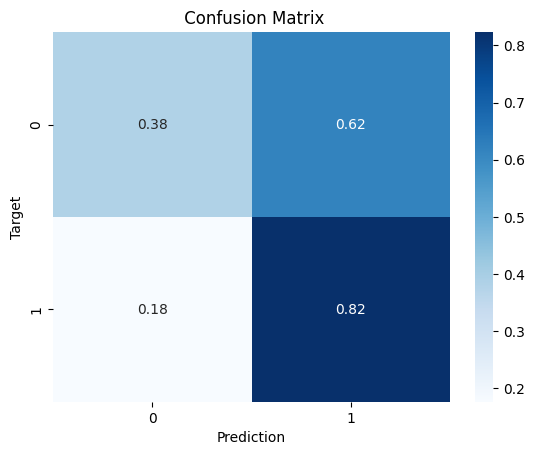

In [122]:
predict_and_plot(sgd_cls_model,val_inputs,val_targets)

Implementation Linear SVC Linear Support Vector Machine

In [123]:
from sklearn.svm import LinearSVC

In [124]:
svm_model = LinearSVC()

In [125]:
svm_model.fit(train_inputs,train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [126]:
svm_model.max_iter

1000

This is a LinearSVC()
Accuracy: 62.60%


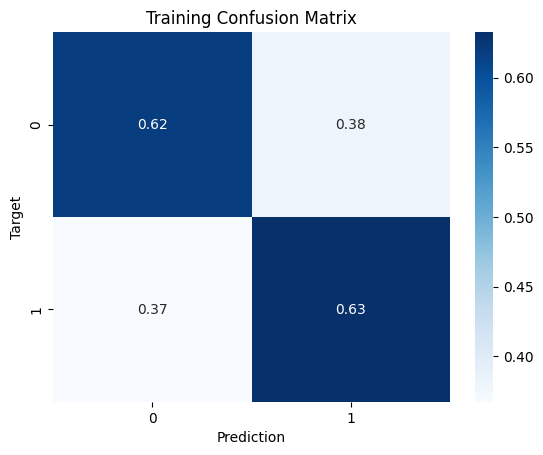

In [127]:
predict_and_plot(svm_model,train_inputs,train_targets,"Training")

This is a LinearSVC()
Accuracy: 62.69%


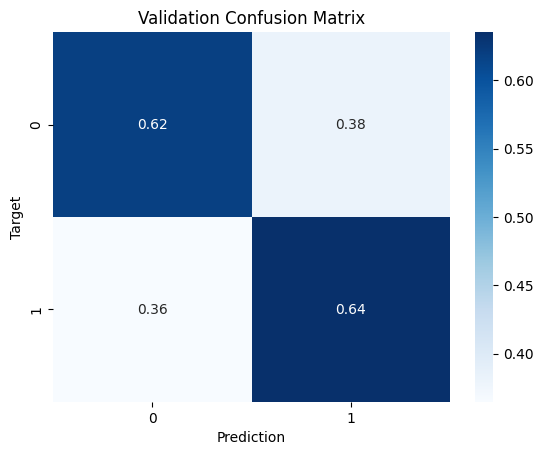

In [128]:
predict_and_plot(svm_model,val_inputs,val_targets,"Validation")

In [129]:
svm_model = LinearSVC(max_iter=2000)

In [130]:
svm_model.fit(train_inputs,train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=2000)

This is a LinearSVC(max_iter=2000)
Accuracy: 62.60%


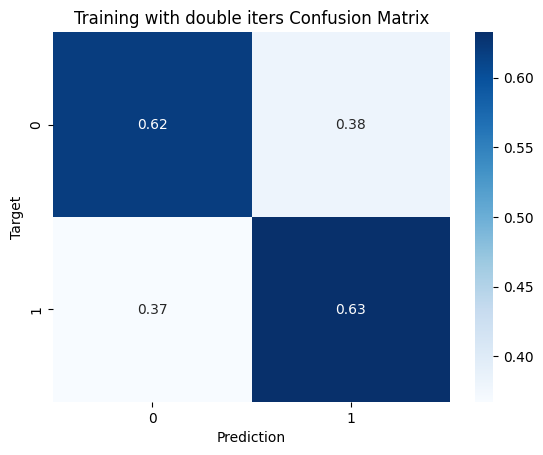

In [131]:
predict_and_plot(svm_model,train_inputs,train_targets,"Training with double iters")

This is a LinearSVC(max_iter=2000)
Accuracy: 62.68%


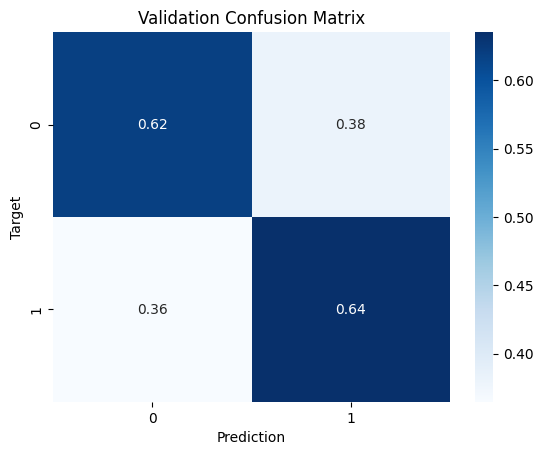

In [132]:
predict_and_plot(svm_model,val_inputs,val_targets,"Validation")

Implementing Random forest classifier along with SelectFromModel for binary classification

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [134]:
rf_classifier = RandomForestClassifier()

In [135]:
rf_classifier.fit(train_inputs,train_targets)

RandomForestClassifier()

This is a RandomForestClassifier()
Accuracy: 100.00%


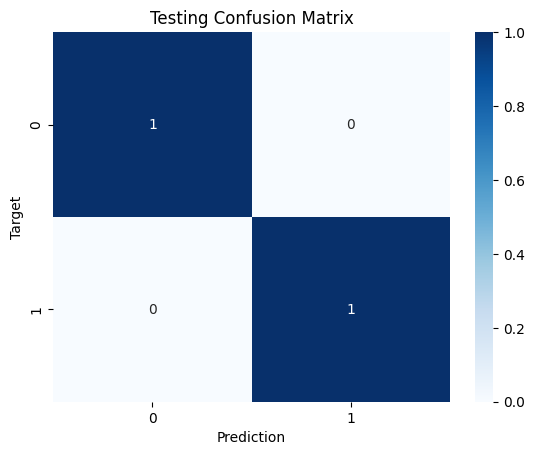

In [136]:
predict_and_plot(rf_classifier,train_inputs,train_targets,"Testing")

This is a RandomForestClassifier()
Accuracy: 63.12%


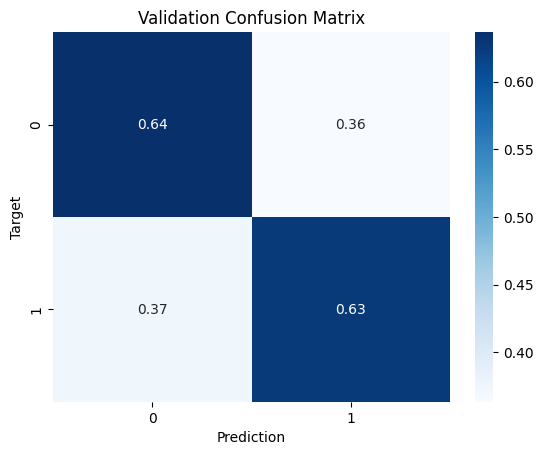

In [137]:
predict_and_plot(rf_classifier,val_inputs,val_targets,"Validation")

Training with selected cols using feature selector

In [138]:
rf_classifier_selected = RandomForestClassifier()

In [139]:
feature_selector = SelectFromModel(estimator=rf_classifier_selected)

In [140]:
feature_selector.fit(train_inputs,train_targets)

SelectFromModel(estimator=RandomForestClassifier())

In [141]:
train_inputs_selected = feature_selector.transform(train_inputs)

In [142]:
val_inputs_selected = feature_selector.transform(val_inputs)

In [143]:
rf_classifier_selected.fit(train_inputs_selected,train_targets)

RandomForestClassifier()

This is a RandomForestClassifier()
Accuracy: 100.00%


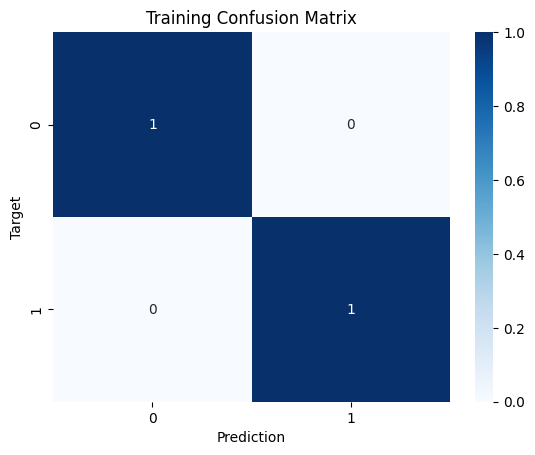

In [144]:
predict_and_plot(rf_classifier_selected,train_inputs_selected,train_targets,"Training")

This is a RandomForestClassifier()
Accuracy: 62.40%


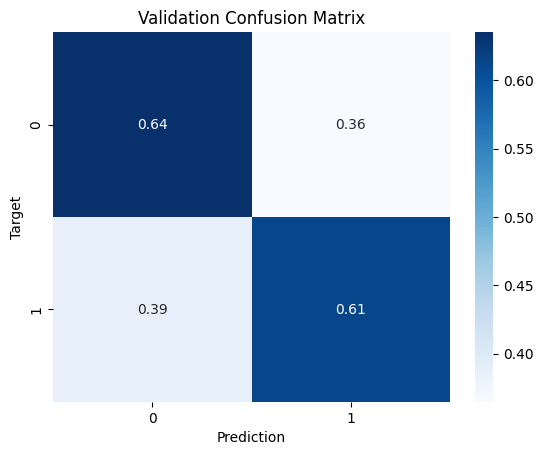

In [145]:
predict_and_plot(rf_classifier_selected,val_inputs_selected,val_targets,"Validation")

In [146]:
print(rf_classifier_selected.n_estimators)
print(rf_classifier_selected.max_depth)
print(rf_classifier_selected.min_samples_split)
print(rf_classifier_selected.min_samples_leaf)
print(rf_classifier_selected.max_features)

100
None
2
1
sqrt


Implement hyper parameter tuning and update the sheet
https://docs.google.com/spreadsheets/d/1YWNJ6m5S1q9P3unPZIXtffsp9blq2os9t9_jASUJglE/edit#gid=1191996802

plot the graphs using hypertuning parameters https://jovian.com/learn/zero-to-data-analyst-bootcamp/assignment/assignment-9-decision-trees-and-random-forests/your-notebooks#C61

In [147]:
from sklearn.metrics import mean_squared_error

In [153]:
#Regular Random Forest Classifier
def test_params(**params):
  model = RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(train_inputs,train_targets)
  train_rmse = mean_squared_error(model.predict(train_inputs),train_targets,squared = False)
  val_rmse = mean_squared_error(model.predict(val_inputs),val_targets,squared=False)
  return train_rmse,val_rmse

In [148]:
def test_param_and_plot(param_name,param_values):
  train_errors,val_errors = [],[]
  for value in param_values:
    params = { param_name : value}
    train_rmse,val_rmse = test_params(**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  print("train errors : "+train_errors)
  print("val errors : "+val_errors)
  plt.figure(figsize=(10,6))
  plt.title('Overfitting curve : '+param_name)
  plt.plot(param_values,train_errors,'b-o')
  plt.plot(param_values,val_errors,'r-o')
  plt.xlabel(param_name)
  plt.ylabel('RMSE')
  plt.legend(['Training','Validation'])

Getting Information of estimators and details of tree

In [150]:
# n_estimators is a hyperparameter that determines the number of decision trees to include in the forest.
n_tree_estimators = rf_classifier.n_estimators
print(n_tree_estimators)

100


In [151]:
for i,ptree in enumerate(rf_classifier.estimators_):
  num_nodes = ptree.tree_.node_count
  num_leaves = sum ([1 for i in ptree.tree_.children_left if i == -1])
  depth = ptree.tree_.max_depth
  print(f"Tree {i + 1}: Nodes = {num_nodes}, Leaves = {num_leaves}, Depth = {depth}")

Tree 1: Nodes = 97417, Leaves = 48709, Depth = 48
Tree 2: Nodes = 96937, Leaves = 48469, Depth = 46
Tree 3: Nodes = 97715, Leaves = 48858, Depth = 51
Tree 4: Nodes = 95313, Leaves = 47657, Depth = 51
Tree 5: Nodes = 97247, Leaves = 48624, Depth = 51
Tree 6: Nodes = 94171, Leaves = 47086, Depth = 56
Tree 7: Nodes = 96533, Leaves = 48267, Depth = 46
Tree 8: Nodes = 97405, Leaves = 48703, Depth = 50
Tree 9: Nodes = 96209, Leaves = 48105, Depth = 49
Tree 10: Nodes = 96927, Leaves = 48464, Depth = 50
Tree 11: Nodes = 95143, Leaves = 47572, Depth = 55
Tree 12: Nodes = 97943, Leaves = 48972, Depth = 51
Tree 13: Nodes = 95907, Leaves = 47954, Depth = 46
Tree 14: Nodes = 96127, Leaves = 48064, Depth = 48
Tree 15: Nodes = 96481, Leaves = 48241, Depth = 48
Tree 16: Nodes = 97539, Leaves = 48770, Depth = 49
Tree 17: Nodes = 96805, Leaves = 48403, Depth = 43
Tree 18: Nodes = 96393, Leaves = 48197, Depth = 44
Tree 19: Nodes = 96257, Leaves = 48129, Depth = 46
Tree 20: Nodes = 96303, Leaves = 48152, 

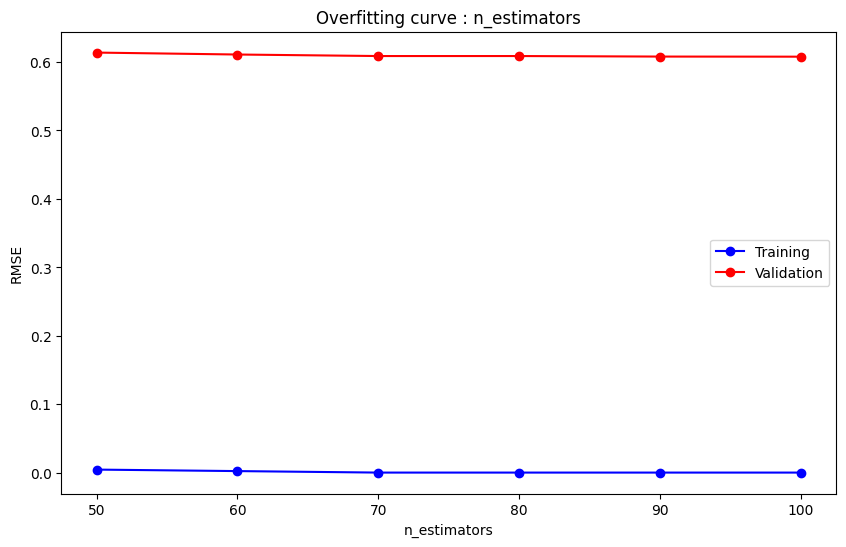

In [154]:
test_param_and_plot('n_estimators', [50,60,70,80,90,100])

seems like there is no big difference using different number of estimators

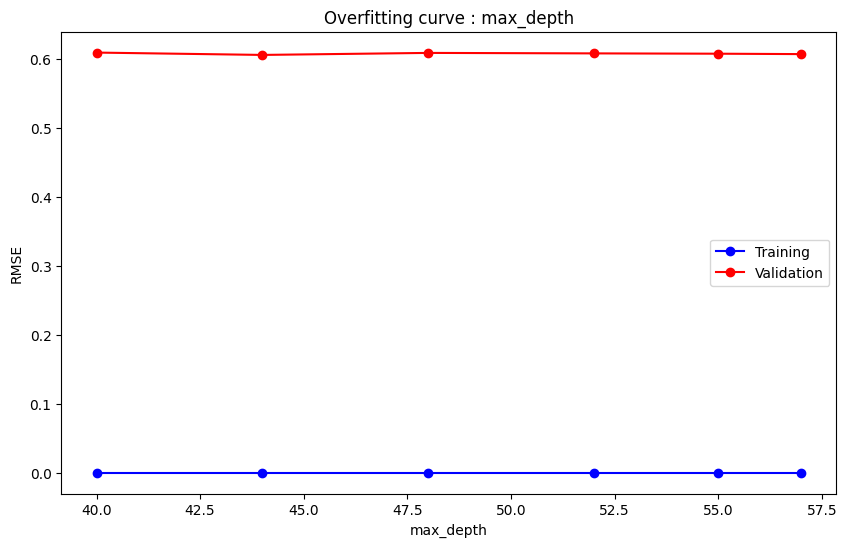

In [156]:
test_param_and_plot('max_depth', [40,44,48,52,55,57])

In [194]:
def test_param_and_plot_plotly(param_name,param_values):
  train_errors,val_errors = [],[]
  for value in param_values:
    params = { param_name : value}
    train_rmse,val_rmse = test_params(**params)
    train_errors.append(train_rmse)
    val_errors.append(val_rmse)
  training = go.Scatter(x=param_values, y=train_errors,  mode='lines+markers',name='Training')
  validation = go.Scatter(x=param_values, y=val_errors,  mode='lines+markers',name='Validation')
  data = [training, validation]
  layout = go.Layout(xaxis_title=param_name, yaxis_title='RMSE',title='Overfitting curve : '+param_name,height=500,width=800)
  fig = go.Figure(data=data, layout=layout)
  fig.show()

In [195]:
test_param_and_plot_plotly('n_estimators', [50,60,70,80,90,100])

In [196]:
test_param_and_plot_plotly('max_depth', [40,44,48,52,55,57])

In [206]:
test_param_and_plot_plotly('max_features', [0.5,0.7,0.9]) # consuming lot of time

In [204]:
test_param_and_plot_plotly('max_leaf_nodes',[47500,48000,48500,49000])

Gradient Boost Implementation

In [207]:
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
gb_classifier = GradientBoostingClassifier()

In [209]:
gb_classifier.fit(train_inputs,train_targets)

GradientBoostingClassifier()

This is a GradientBoostingClassifier()
Accuracy: 63.42%


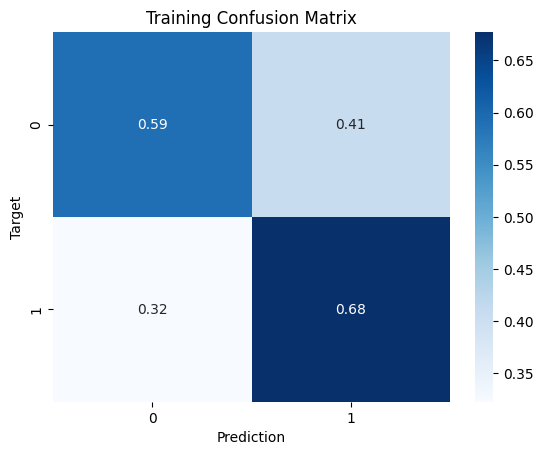

In [210]:
predict_and_plot(gb_classifier,train_inputs,train_targets,"Training")

This is a GradientBoostingClassifier()
Accuracy: 63.11%


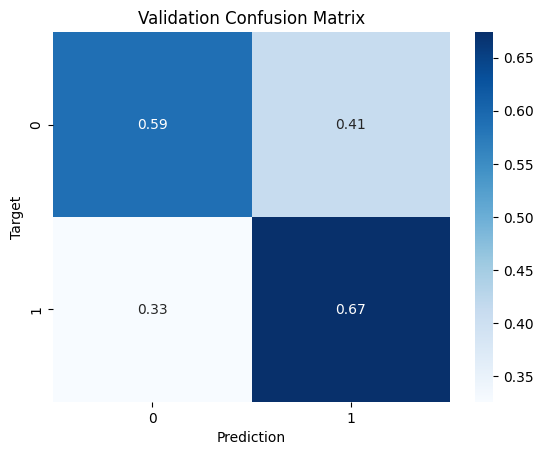

In [211]:
predict_and_plot(gb_classifier,val_inputs,val_targets,"Validation")

Implementing HistGB Classifier from scikit learn

In [212]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [213]:
hist_gb_classifier = HistGradientBoostingClassifier()

In [215]:
hist_gb_classifier.fit(train_inputs,train_targets)

HistGradientBoostingClassifier()

This is a HistGradientBoostingClassifier()
Accuracy: 65.66%


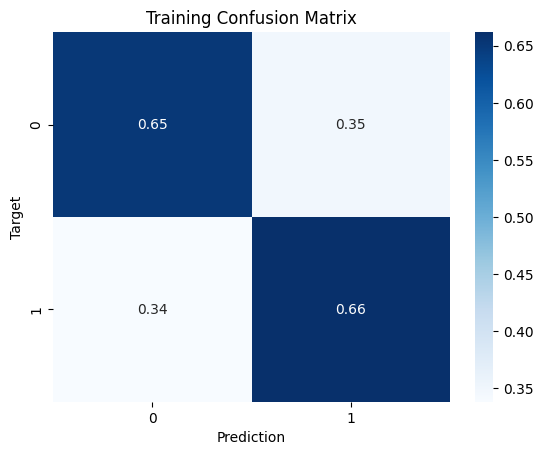

In [216]:
predict_and_plot(hist_gb_classifier,train_inputs,train_targets,"Training")

This is a HistGradientBoostingClassifier()
Accuracy: 64.43%


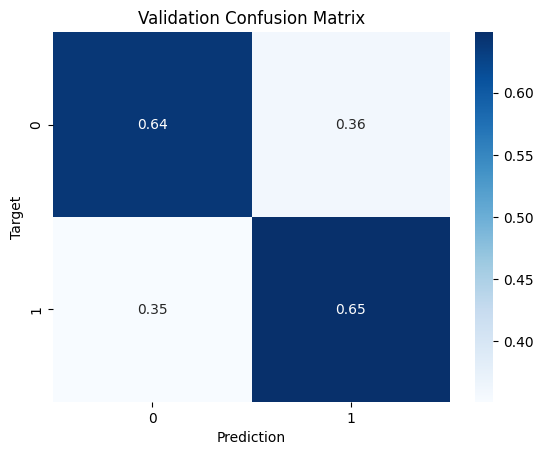

In [217]:
predict_and_plot(hist_gb_classifier,val_inputs,val_targets,"Validation")

Implementation of XG Boost

In [218]:
! pip install xgboost

In [221]:
from xgboost import XGBClassifier

In [223]:
xgb_classifier = XGBClassifier()

In [224]:
xgb_classifier.fit(train_inputs,train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

This is a XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 68.86%


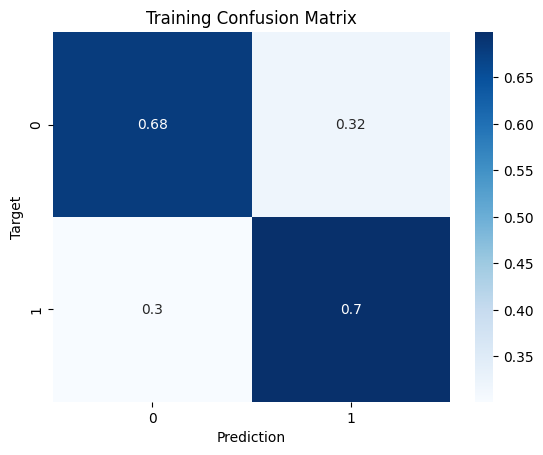

In [225]:
predict_and_plot(xgb_classifier,train_inputs,train_targets,"Training")

This is a XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 64.07%


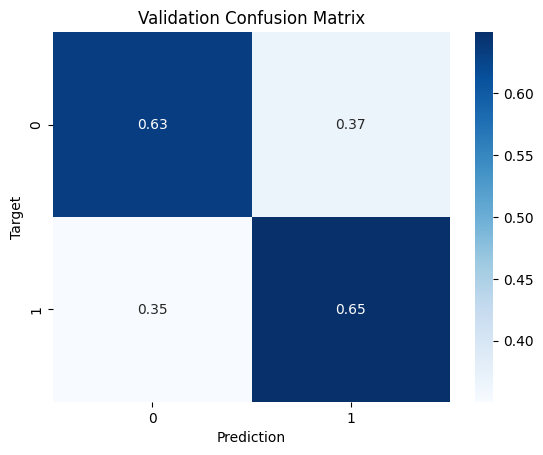

In [226]:
predict_and_plot(xgb_classifier,val_inputs,val_targets,"Validation")

Implementing Light GBM

In [227]:
! pip install lightgbm

In [228]:
import lightgbm as lgb

In [229]:
lgb_classifier = lgb.LGBMClassifier()

In [230]:
lgb_classifier.fit(train_inputs,train_targets)

LGBMClassifier()

This is a LGBMClassifier()
Accuracy: 65.73%


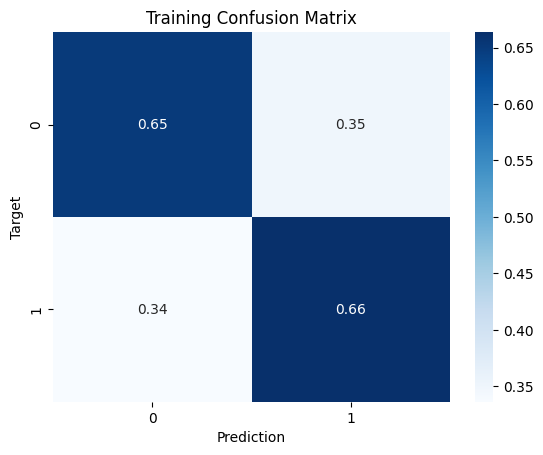

In [231]:
predict_and_plot(lgb_classifier,train_inputs,train_targets,"Training")

This is a LGBMClassifier()
Accuracy: 64.67%


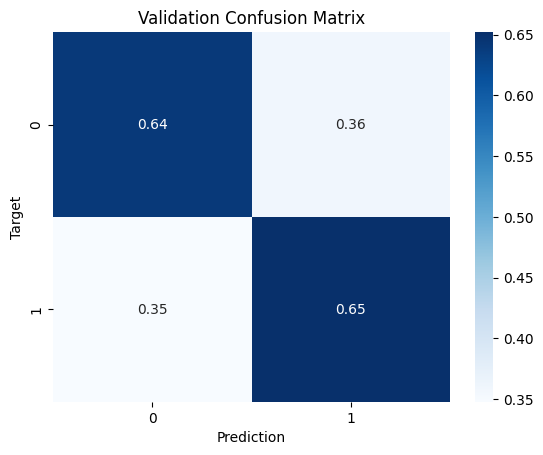

In [232]:
predict_and_plot(lgb_classifier,val_inputs,val_targets,"Validation")

In [234]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.3 MB/s eta 0:00:00


In [235]:
from catboost import CatBoostClassifier

In [237]:
cat_boost_classifier = CatBoostClassifier()

In [238]:
cat_boost_classifier.fit(train_inputs,train_targets)

Learning rate set to 0.101047
0:	learn: 0.6833977	total: 190ms	remaining: 3m 10s
1:	learn: 0.6756789	total: 320ms	remaining: 2m 39s
2:	learn: 0.6693573	total: 438ms	remaining: 2m 25s
3:	learn: 0.6643070	total: 533ms	remaining: 2m 12s
4:	learn: 0.6601660	total: 622ms	remaining: 2m 3s
5:	learn: 0.6568412	total: 714ms	remaining: 1m 58s
6:	learn: 0.6549553	total: 807ms	remaining: 1m 54s
7:	learn: 0.6533020	total: 873ms	remaining: 1m 48s
8:	learn: 0.6518751	total: 992ms	remaining: 1m 49s
9:	learn: 0.6506112	total: 1.19s	remaining: 1m 57s
10:	learn: 0.6483928	total: 1.31s	remaining: 1m 57s
11:	learn: 0.6475175	total: 1.41s	remaining: 1m 56s
12:	learn: 0.6459516	total: 1.54s	remaining: 1m 56s
13:	learn: 0.6450958	total: 1.69s	remaining: 1m 59s
14:	learn: 0.6445123	total: 1.85s	remaining: 2m 1s
15:	learn: 0.6431517	total: 1.99s	remaining: 2m 2s
16:	learn: 0.6425591	total: 2.08s	remaining: 2m
17:	learn: 0.6419715	total: 2.17s	remaining: 1m 58s
18:	learn: 0.6415003	total: 2.25s	remaining: 1m 56s

This is a <catboost.core.CatBoostClassifier object at 0x7f1b2a230c10>
Accuracy: 69.37%


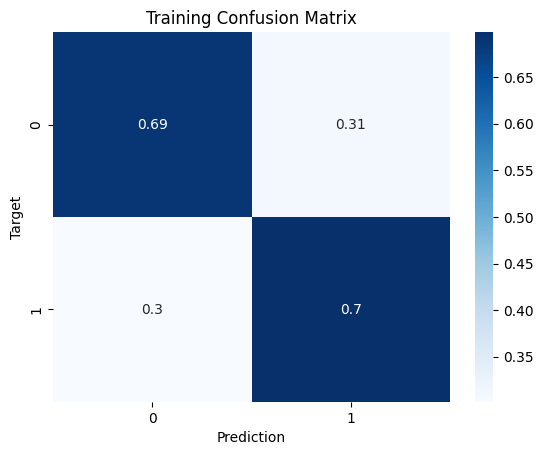

In [239]:
predict_and_plot(cat_boost_classifier,train_inputs,train_targets,"Training")

This is a <catboost.core.CatBoostClassifier object at 0x7f1b2a230c10>
Accuracy: 65.11%


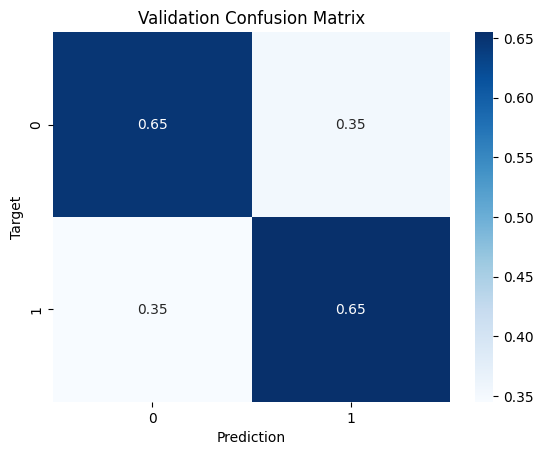

In [240]:
predict_and_plot(cat_boost_classifier,val_inputs,val_targets,"Validation")